In [1]:
# import the docx2txt library
import docx2txt
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
# import ntlk library 
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [3]:
# import pandas and dataframe
import pandas as pd
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [4]:
# import textblob library
from textblob import TextBlob

In [5]:
# import matplotlib and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# check dataframe
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
# drop unnecessary columns
df = df.drop(['Unnamed: 0', 'Clothing ID', 'Age', 'Recommended IND', 'Positive Feedback Count', 'Class Name'], axis=1)

In [8]:
# convert all the column names to lower cases
df.columns = map(str.lower, df.columns)

In [9]:
# check the dataframe - division and department name are based of categories
df.head(10)

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops
7,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,General Petite,Tops
8,Flattering,I love this dress. i usually get an xs but it ...,5,General,Dresses
9,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,General,Dresses


In [10]:
# check the dataframe numericals
df.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [11]:
# check number of columns and rows
df.shape

(23486, 5)

In [12]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


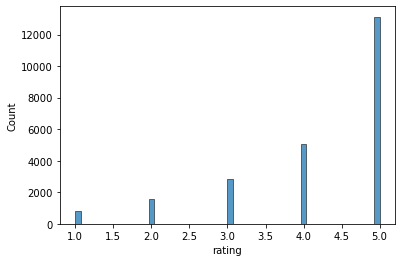

In [13]:
# create histogram to look at ratings - more high ratings than low
sns.histplot(data=df, x="rating")

In [14]:
# group based on department name, division name and average rating
df_group = df.groupby(["department name", "division name"]).mean()["rating"]

In [15]:
df_group

department name  division name 
Bottoms          General           4.268686
                 General Petite    4.329356
Dresses          General           4.163003
                 General Petite    4.133256
Intimate         General Petite    4.240343
                 Initmates         4.286285
Jackets          General           4.240310
                 General Petite    4.304910
Tops             General           4.148749
                 General Petite    4.216469
Trend            General           3.822917
                 General Petite    3.782609
Name: rating, dtype: float64

Text(0, 0.5, 'average score')

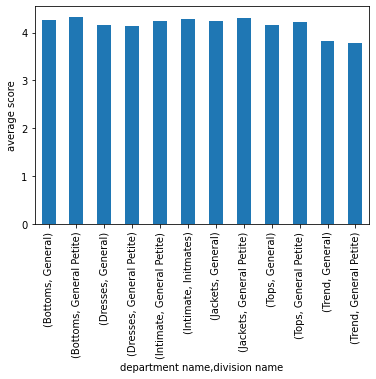

In [16]:
# create histogram for the group by department name, division name and average rating
ax = df_group.plot(kind = 'bar')
ax.set_ylabel('average score')

In [17]:
# create the polarity for the 5th row and second column (text review)
testimonial = TextBlob(df.iloc[5][1])
testimonial.sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [18]:
# check the text of the iloc
(df.iloc[5][1])

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

In [19]:
# drop nulls
df.dropna(subset=['review text'], inplace=True)

In [20]:
# check if nulls have been dropped and how many rows have remained
df.shape

(22641, 5)

In [21]:
# create sentiment column for each row
df['sentiment']=df['review text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [22]:
# check if it worked 
df.head()

,title,review text,rating,division name,department name,sentiment
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891


In [36]:
# create a group by for division name, department name and minimum sentiment
df_group2 = df.groupby(["division name", "department name"]) ["sentiment"].min()

In [37]:
# check if group by worked 
df_group2

division name   department name
General         Bottoms           -0.533333
                Dresses           -0.916667
                Jackets           -0.750000
                Tops              -0.975000
                Trend             -0.270833
General Petite  Bottoms           -0.257778
                Dresses           -0.400000
                Intimate          -0.575000
                Jackets           -0.562500
                Tops              -0.700000
                Trend             -0.083333
Initmates       Intimate          -0.392333
Name: sentiment, dtype: float64

Text(0, 0.5, 'lowest sentiment')

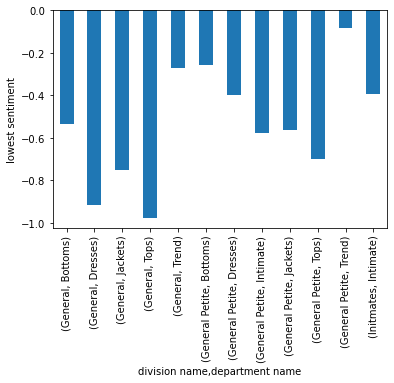

In [38]:
# create histogram for second group by
ax = df_group2.plot(kind = 'bar')
ax.set_ylabel('lowest sentiment')

In [41]:
# create group by for division name, department name and average sentiment
df_group3 = df.groupby(["division name", "department name"]) .mean()["sentiment"]

Text(0, 0.5, 'average sentiment')

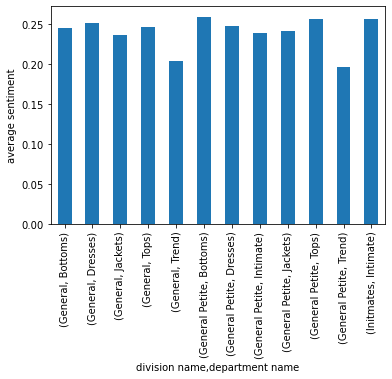

In [43]:
# create histogram for third group by
ax = df_group3.plot(kind = 'bar')
ax.set_ylabel('average sentiment')